In [1]:
import sys
print('Python {}'.format(sys.version))
import scipy
print('SciPy {}'.format(scipy.__version__))

Python 3.11.4 | packaged by Anaconda, Inc. | (main, Jul  5 2023, 13:38:37) [MSC v.1916 64 bit (AMD64)]
SciPy 1.10.1


In [15]:
import pandas
from pandas import read_csv
from pandas.plotting import scatter_matrix
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn import model_selection
from sklearn.ensemble import VotingClassifier

In [3]:
dataset=read_csv('iris.csv')
dataset

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica


In [4]:
#dimensions of dataset
print(dataset.shape)

(150, 5)


In [5]:
dataset.head(20)

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
5,5.4,3.9,1.7,0.4,Setosa
6,4.6,3.4,1.4,0.3,Setosa
7,5.0,3.4,1.5,0.2,Setosa
8,4.4,2.9,1.4,0.2,Setosa
9,4.9,3.1,1.5,0.1,Setosa


In [6]:
#statistical summary
dataset.describe()

,sepal.length,sepal.width,petal.length,petal.width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [7]:
#class distribution 
print(dataset.groupby('variety').size())

variety
Setosa        50
Versicolor    50
Virginica     50
dtype: int64


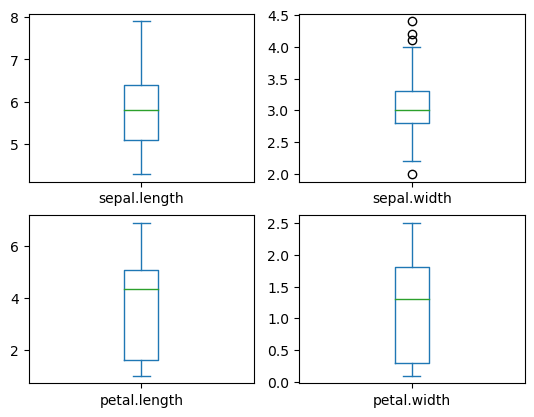

In [26]:
#univariate plots-box and whisker plots
dataset.plot(kind='box',subplots=True,layout=(2,2),sharex=False,sharey=False)
pyplot.show()

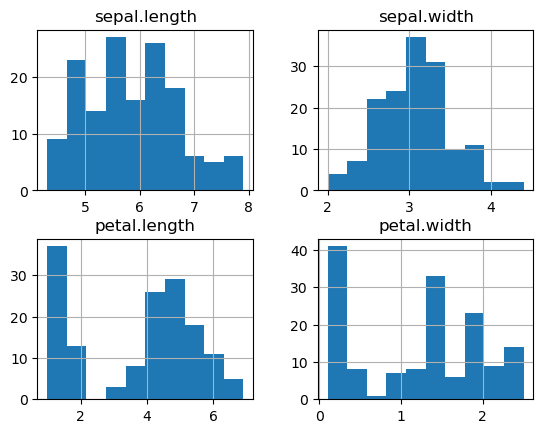

In [9]:
#histogram of the variable
dataset.hist()
pyplot.show()

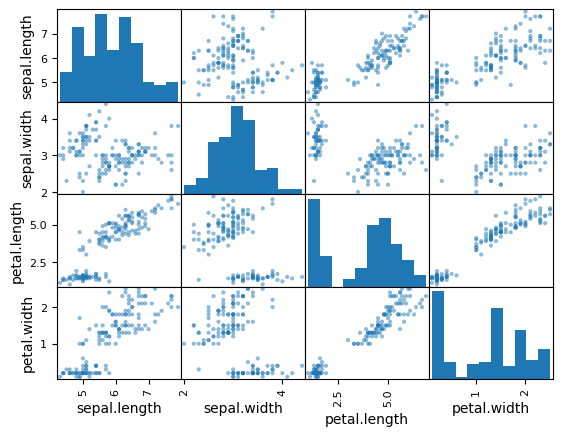

In [10]:
#multivariate plots
scatter_matrix(dataset)
pyplot.show()

In [13]:
#creating a validation dataset
#splitting dataset
array=dataset.values
x=array[:,0:4]
y=array[:,4]
x_train,x_validation,y_train,y_validation=train_test_split(x,y,test_size=0.2,random_state=1)

In [17]:
#Logistic Regression
#Linear Discriminant Analysis
#K-Nearest neighbors
#Classisfication and Regression Trees
#Gaussian Naive Bayes
#SVM

#building models
models=[]
models.append(('LR',LogisticRegression(solver='liblinear',multi_class='ovr')))
models.append(('LDA',LinearDiscriminantAnalysis()))
models.append(('KNN',KNeighborsClassifier()))
models.append(('NB',GaussianNB()))
models.append(('SVM',SVC(gamma='auto')))



In [28]:
results=[]
names=[]
for name,model in models:
    kfold=StratifiedKFold(n_splits=10)
    cv_score=cross_val_score(model,x_train,y_train,cv=kfold,scoring='accuracy')
    results.append(cv_score)
    names.append(name)
    print('%s: %f (%f)' % (name,cv_score.mean()*100,cv_score.std()))

LR: 95.000000 (0.055277)
LDA: 97.500000 (0.038188)
KNN: 95.833333 (0.041667)
NB: 95.000000 (0.055277)
SVM: 98.333333 (0.033333)


<function matplotlib.pyplot.show(close=None, block=None)>

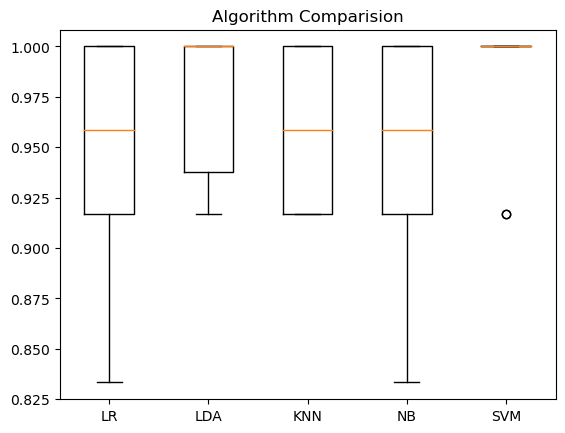

In [29]:
#compare models
pyplot.boxplot(results,labels=names)
pyplot.title('Algorithm Comparision')
pyplot.show

In [31]:
#make predictions on svm
model=SVC(gamma='auto')
model.fit(x_train,y_train)
predictions=model.predict(x_validation)
predictions

array(['Setosa', 'Versicolor', 'Versicolor', 'Setosa', 'Virginica',
       'Versicolor', 'Virginica', 'Setosa', 'Setosa', 'Virginica',
       'Versicolor', 'Setosa', 'Virginica', 'Versicolor', 'Versicolor',
       'Setosa', 'Versicolor', 'Versicolor', 'Setosa', 'Setosa',
       'Versicolor', 'Versicolor', 'Virginica', 'Setosa', 'Virginica',
       'Versicolor', 'Setosa', 'Setosa', 'Versicolor', 'Virginica'],
      dtype=object)

In [32]:
#evaluate predictions
print(accuracy_score(y_validation,predictions))
print(confusion_matrix(y_validation,predictions))
print(classification_report(y_validation,predictions))

0.9666666666666667
[[11  0  0]
 [ 0 12  1]
 [ 0  0  6]]
              precision    recall  f1-score   support

      Setosa       1.00      1.00      1.00        11
  Versicolor       1.00      0.92      0.96        13
   Virginica       0.86      1.00      0.92         6

    accuracy                           0.97        30
   macro avg       0.95      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30

